In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [3]:
df['date'] = df['date'].str.strip()
df['date_only'] = pd.to_datetime(df['date'], errors='coerce', utc=True).dt.date
df = df.dropna(subset=['date_only'])

In [4]:
positive_words = ['up', 'gain', 'rise', 'growth', 'beat', 'profit', 'surge']
negative_words = ['down', 'fall', 'drop', 'loss', 'miss', 'decline', 'warn']

def sentiment_score(text):
    text = str(text).lower()
    score = 0
    for word in positive_words:
        if word in text:
            score += 1
    for word in negative_words:
        if word in text:
            score -= 1
    return score

df['sentiment'] = df['headline'].apply(sentiment_score)

In [5]:
daily_sentiment = df.groupby('date_only')['sentiment'].mean()

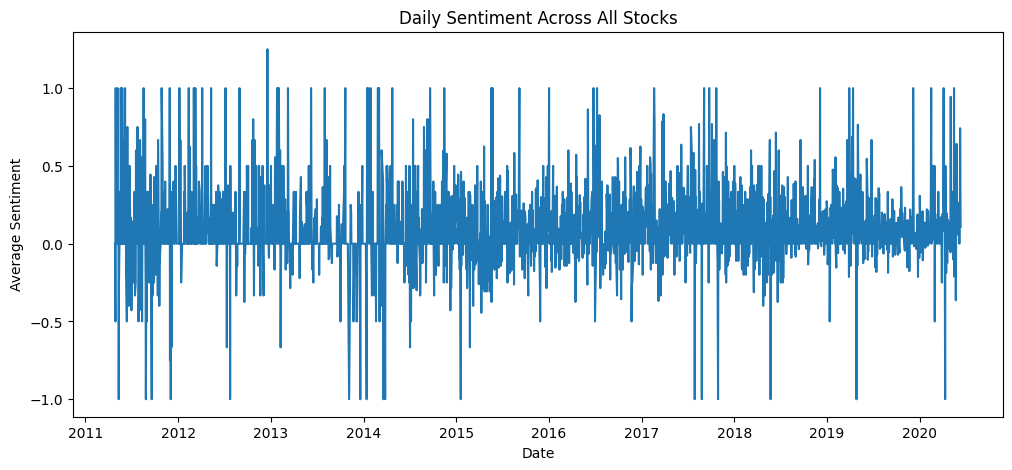

In [6]:
plt.figure(figsize=(12,5))
daily_sentiment.plot()
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Daily Sentiment Across All Stocks')
plt.show()

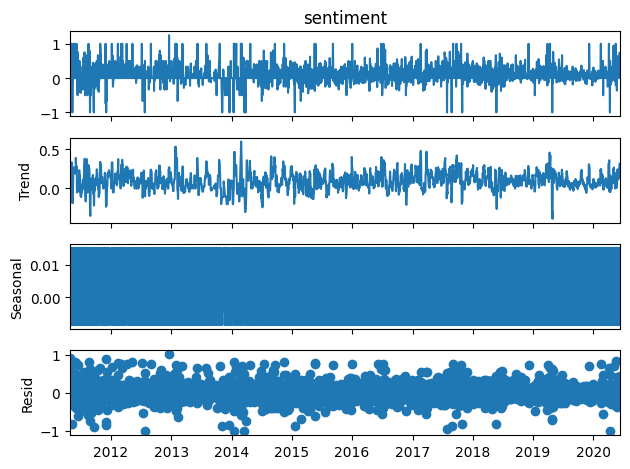

In [7]:
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)
decomposition = seasonal_decompose(daily_sentiment, model='additive', period=5)
decomposition.plot()
plt.show()